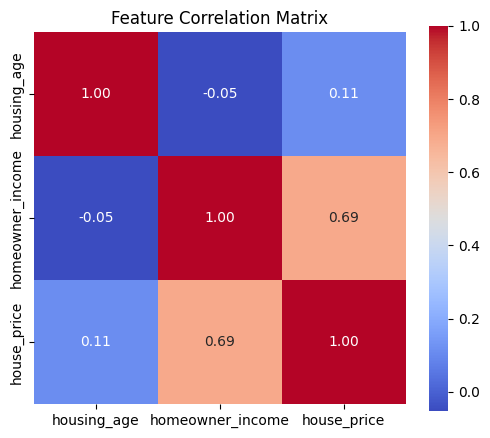

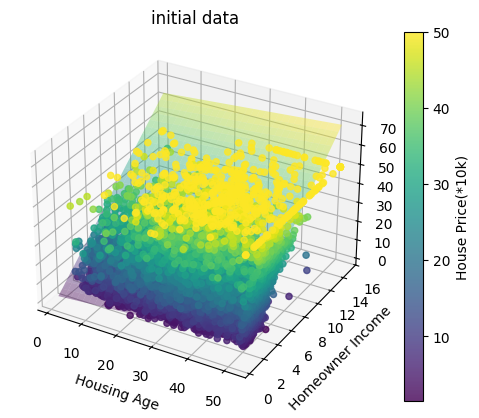

In [12]:
#原始数据
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# 1. 读取数据
df = pd.read_excel('MLP_data.xlsx')

# 2. 提取特征和目标
X = df[['housing_age', 'homeowner_income']].values
y = df['house_price'].values
y=[i/10000 for i in y]
df_corr = df[['housing_age', 'homeowner_income', 'house_price']]

# 计算相关系数矩阵
corr_matrix = df_corr.corr()

# 绘制热力图
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Feature Correlation Matrix')
plt.show()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
coef_age, coef_income = model.coef_
intercept = model.intercept_

# 创建平面网格
age_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
income_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
age_grid, income_grid = np.meshgrid(age_vals, income_vals)

# 计算平面上的预测房价
price_grid = intercept + coef_age * age_grid + coef_income * income_grid

# 绘图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 渐变色散点图
scatter = ax.scatter(
    X[:, 0], X[:, 1], y,
    c=y,
    cmap='viridis',
    marker='o',
    s=20,
    alpha=0.8
)

# 拟合平面（半透明）
ax.plot_surface(
    age_grid, income_grid, price_grid,
    alpha=0.4,
    cmap='viridis',
    edgecolor='none'
)

# 标签与颜色条
ax.set_xlabel('Housing Age')
ax.set_ylabel('Homeowner Income')
ax.set_zlabel('House Price')
fig.colorbar(scatter, ax=ax, label='House Price(*10k)')
plt.title('initial data')
plt.show()

